## Преобразования функций и полиномы. Домашнее задание

С помощью SymPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции.<br><br>
Средний уровень <br><br>
$(-2, 2), (-1, 1), (0, 0), (1, 1), (2, 2)$<br><br>
Сложный уровень <br><br>
$(-3, 33), (-2, 31), (-1, 18), (1, -18), (2, -31), (3, -33)$


In [125]:
from functools import reduce
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display

sp.init_printing()


In [141]:
from sympy.abc import x

def analyze(f: sp.core.expr.Expr, dots: List[Tuple[float, float]]) -> None:
    display(f)

    xs, ys = zip(*dots)
    xx = np.linspace(-5, 5, 500)
    yy = sp.lambdify(x, f)(xx)
    plt.plot(xx, yy)
    plt.scatter(xs, ys)
    
    display(        
        ["zeors:", sp.solve(f)], 
        [f < 0, "on", sp.solve(f < 0)], 
        [f > 0, "on", sp.solve(f > 0)],
        ["f is even:", f == f.subs(x, -x)],
        ["f is odd:", f == -f.subs(x, -x)]
    )

def find_poly(dots: List[Tuple[float, float]]) -> sp.core.expr.Expr:
    xs, ys = zip(*dots)
    ys = sp.Matrix(ys)
    
    powers = [[x ** i for i in range(len(dots) - 1, -1, -1)] for x in xs]
    a = sp.Matrix(powers).LUsolve(ys)

    return reduce(
        lambda acc, e: acc + e[1] * x ** (len(dots) - e[0]),
        enumerate(a, 1),
        sp.simplify(0)
    )

def find_poly_and_analyze(dots: List[Tuple[float, float]]) -> None:
    analyze(find_poly(dots), dots)


['zeors:', [0, -sqrt(7), sqrt(7)]]

[-x**4/6 + 7*x**2/6 < 0,
 'on',
 ((x < oo) & (sqrt(7) < x)) | ((-oo < x) & (x < -sqrt(7)))]

[-x**4/6 + 7*x**2/6 > 0,
 'on',
 ((0 < x) & (x < sqrt(7))) | ((x < 0) & (-sqrt(7) < x))]

['f is even:', True]

['f is odd:', False]

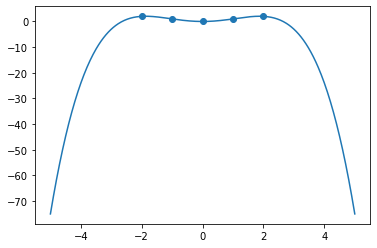

In [142]:
find_poly_and_analyze([(-2, 2), (-1, 1), (0, 0), (1, 1), (2, 2)])

['zeors:',
 [0,
  -I*sqrt(95/2 + sqrt(18049)/2),
  I*sqrt(95/2 + sqrt(18049)/2),
  -sqrt(-95/2 + sqrt(18049)/2),
  sqrt(-95/2 + sqrt(18049)/2)]]

[x**5/120 + 19*x**3/24 - 94*x/5 < 0,
 'on',
 ((-oo < x) & (x < CRootOf(x**4 + 95*x**2 - 2256, 0))) | ((0 < x) & (x < CRootOf(x**4 + 95*x**2 - 2256, 1)))]

[x**5/120 + 19*x**3/24 - 94*x/5 > 0,
 'on',
 ((x < 0) & (CRootOf(x**4 + 95*x**2 - 2256, 0) < x)) | ((x < oo) & (CRootOf(x**4 + 95*x**2 - 2256, 1) < x))]

['f is even:', False]

['f is odd:', True]

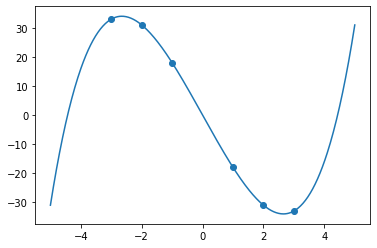

In [143]:
find_poly_and_analyze([(-3, 33), (-2, 31), (-1, 18), (1, -18), (2, -31), (3, -33)])

Проверим, что нули совпадают с результатом выражения CRootOf:

In [156]:
sp.CRootOf(x**4 + 95*x**2 - 2256, 0).eval_approx(6)

In [153]:
from math import sqrt
-sqrt(-95/2 + sqrt(18049)/2)

Кажись, все хорошо) Непонятно только, почему sympy один раз привел все к радикалам, а другой — поленился.